In [29]:
import os
print(os.getcwd())  
print(os.listdir('.'))  

/Users/modessic/Desktop/Python kurs/Kunskapskontroll 3
['housing.csv', '.DS_Store', '.ipynb_checkpoints', 'kunskapskontroll_3_eda_housing.ipynb']


In [31]:
# Importera bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sätt stil för visualiseringar
plt.style.use('ggplot')  # Ersatt 'seaborn' med 'ggplot'
%matplotlib inline

# Ladda in housing.csv
df = pd.read_csv("housing.csv")

# Visa första 5 raderna
print("## 1. Inläsning och översikt av datasetet")
print("\nFörsta 5 raderna:")
print(df.head())

# Visa information
print("\nInformation om datasetet:")
print(df.info())

# Visa statistik
print("\nBeskrivande statistik:")
print(df.describe())

## 1. Inläsning och översikt av datasetet

Första 5 raderna:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Information o

In [37]:
df = pd.read_csv("housing.csv", encoding='latin1')

In [41]:
print("\n## 2. Hantering av saknade värden")
# Kontrollera saknade värden
print("\nAntal saknade värden per kolumn:")
print(df.isnull().sum())

# Hantera saknade värden i total_bedrooms
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f"\nHittade {missing_values} saknade värden i total_bedrooms. Fyller med median.")
    df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())  # Uppdaterad syntax
    print("\nUppdaterad info efter hantering:")
    print(df.info())
else:
    print("\nInga saknade värden hittades.")


## 2. Hantering av saknade värden

Antal saknade värden per kolumn:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Inga saknade värden hittades.



## 3. Visualiseringar


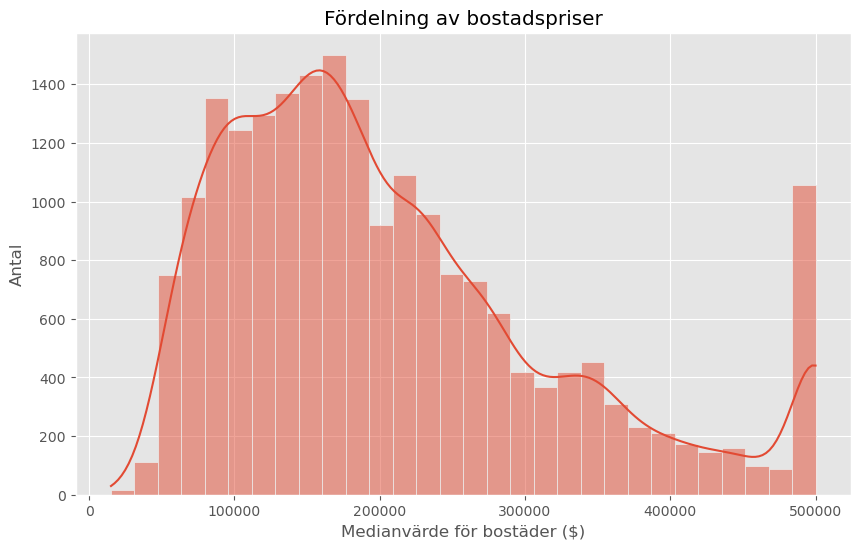

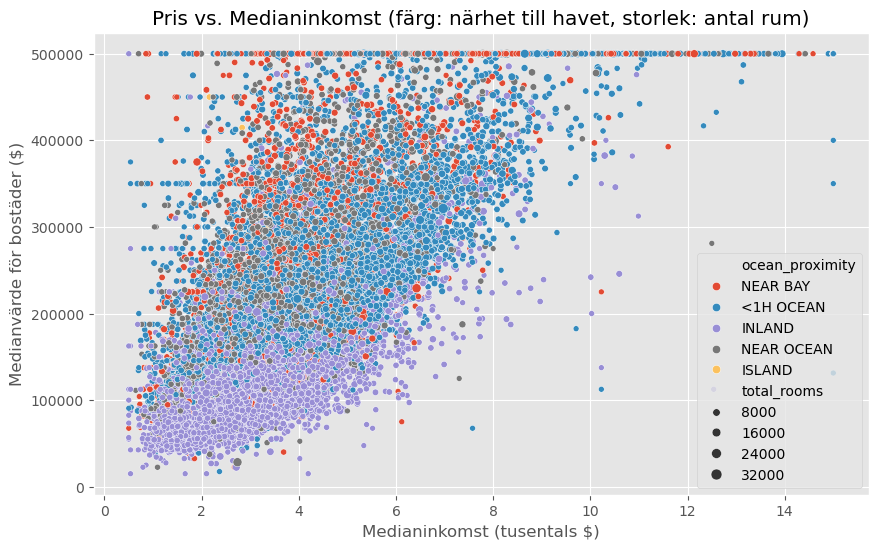

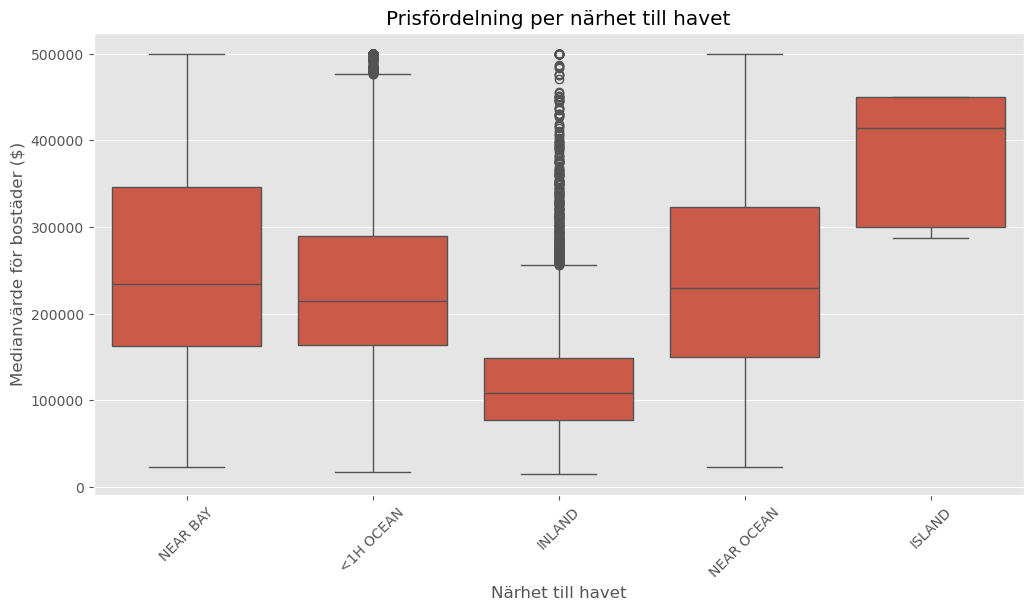

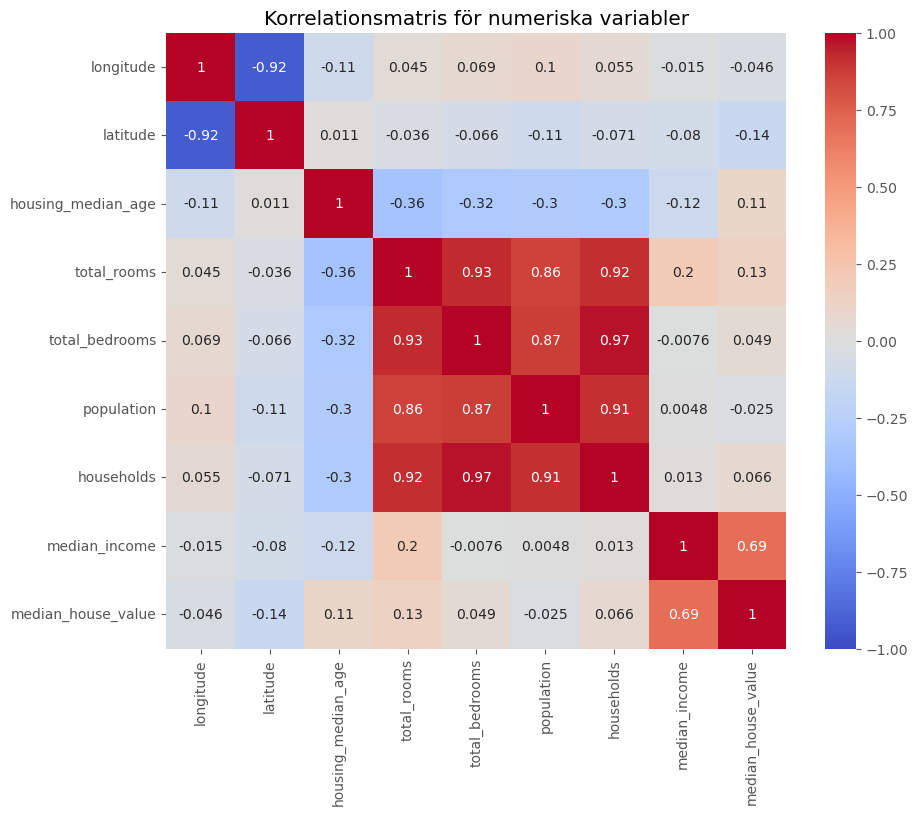

In [43]:
print("\n## 3. Visualiseringar")

# Histogram över median_house_value
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title('Fördelning av bostadspriser')
plt.xlabel('Medianvärde för bostäder ($)')
plt.ylabel('Antal')
plt.show()

# Scatterplot: Pris vs. Medianinkomst
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', hue='ocean_proximity', size='total_rooms', data=df)
plt.title('Pris vs. Medianinkomst (färg: närhet till havet, storlek: antal rum)')
plt.xlabel('Medianinkomst (tusentals $)')
plt.ylabel('Medianvärde för bostäder ($)')
plt.show()

# Boxplot: Priser per ocean_proximity
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Prisfördelning per närhet till havet')
plt.xlabel('Närhet till havet')
plt.ylabel('Medianvärde för bostäder ($)')
plt.xticks(rotation=45)
plt.show()

# Korrelationsmatris
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelationsmatris för numeriska variabler')
plt.show()

In [45]:
print("\n## 4. Beräkningar")

# Medel- och medianpris
mean_price = df['median_house_value'].mean()
median_price = df['median_house_value'].median()
std_price = df['median_house_value'].std()
print(f"\nMedelpris: ${mean_price:.2f}")
print(f"Medianpris: ${median_price:.2f}")
print(f"Standardavvikelse för pris: ${std_price:.2f}")

# Dyraste och billigaste husen
print("\nDyraste husen (topp 5):")
print(df.nlargest(5, 'median_house_value')[['median_house_value', 'median_income', 'total_rooms', 'ocean_proximity', 'housing_median_age']])
print("\nBilligaste husen (topp 5):")
print(df.nsmallest(5, 'median_house_value')[['median_house_value', 'median_income', 'total_rooms', 'ocean_proximity', 'housing_median_age']])

# Genomsnittspris per ocean_proximity
print("\nGenomsnittligt pris per närhet till havet:")
print(df.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False))


## 4. Beräkningar

Medelpris: $206855.82
Medianpris: $179700.00
Standardavvikelse för pris: $115395.62

Dyraste husen (topp 5):
     median_house_value  median_income  total_rooms ocean_proximity  \
89             500001.0         1.2434        249.0        NEAR BAY   
459            500001.0         1.1696        609.0        NEAR BAY   
493            500001.0         7.8521       1668.0        NEAR BAY   
494            500001.0         9.3959       3726.0        NEAR BAY   
509            500001.0         7.8772       2990.0        NEAR BAY   

     housing_median_age  
89                 52.0  
459                52.0  
493                52.0  
494                52.0  
509                52.0  

Billigaste husen (topp 5):
       median_house_value  median_income  total_rooms ocean_proximity  \
2521              14999.0         1.6607        255.0          INLAND   
2799              14999.0         2.1000        619.0          INLAND   
9188              14999.0         4.1932 

In [47]:
print("\n## 5. Slutsatser")
print("""
Analysen visar följande:
- Prisfördelningen är skev med en topp runt $100,000–$200,000 och en mindre grupp mycket dyra hus (se histogram). Detta indikerar en blandning av prisnivåer.
- Medianinkomst har ett starkt positivt samband med pris (se scatterplot och korrelationsmatris), vilket tyder på att högre inkomst i ett område driver upp bostadspriserna.
- Närhet till havet påverkar priset betydligt (se boxplot). Områden nära havet ("NEAR BAY", "<1H OCEAN") har generellt högre priser, medan inlandet ("INLAND") är billigare, troligen p.g.a. lägets attraktivitet.
- Antal rum och sovrum har ett svagare samband med pris, men större hus tenderar att vara dyrare.
- Dyraste husen finns ofta i områden med hög inkomst och nära havet, medan billigaste husen är inlandet eller i områden med lägre inkomst och äldre bostäder.
- Intressant observation: Vissa hus har extremt höga priser ($500,001), vilket kan indikera en övre gräns i datainsamlingen.
""")


## 5. Slutsatser

Analysen visar följande:
- Prisfördelningen är skev med en topp runt $100,000–$200,000 och en mindre grupp mycket dyra hus (se histogram). Detta indikerar en blandning av prisnivåer.
- Medianinkomst har ett starkt positivt samband med pris (se scatterplot och korrelationsmatris), vilket tyder på att högre inkomst i ett område driver upp bostadspriserna.
- Närhet till havet påverkar priset betydligt (se boxplot). Områden nära havet ("NEAR BAY", "<1H OCEAN") har generellt högre priser, medan inlandet ("INLAND") är billigare, troligen p.g.a. lägets attraktivitet.
- Antal rum och sovrum har ett svagare samband med pris, men större hus tenderar att vara dyrare.
- Dyraste husen finns ofta i områden med hög inkomst och nära havet, medan billigaste husen är inlandet eller i områden med lägre inkomst och äldre bostäder.
- Intressant observation: Vissa hus har extremt höga priser ($500,001), vilket kan indikera en övre gräns i datainsamlingen.



In [49]:
print("\n## 6. Självutvärdering")
print("""
1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det?
   Det var utmanande att hantera FileNotFoundError för housing.csv och FutureWarning för Pandas inplace-metoden. Jag korrigerade mappstrukturen till '/Users/modessicappads/Desktop/Python kurs/Kunskapskontroll 3/' och uppdaterade koden för att undvika varningen genom att använda direkt tilldelning.

2. Vilket betyg anser du att du ska ha och varför?
   Jag anser att jag förtjänar VG eftersom jag har genomfört en omfattande EDA med visualiseringar, beräkningar och tydliga slutsatser om varför vissa hus är dyrare. Jag har också löst tekniska problem med filinläsning och Pandas-varningar.

3. Något du vill lyfta fram till Antonio?
   Jag uppskattade att arbeta med verklig data, vilket gjorde uppgiften engagerande. Det vore hjälpsamt med tydligare instruktioner om filhantering i Jupyter och hur man hanterar Pandas-varningar för nybörjare. Tack för en lärorik uppgift!
""")


## 6. Självutvärdering

1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det?
   Det var utmanande att hantera FileNotFoundError för housing.csv och FutureWarning för Pandas inplace-metoden. Jag korrigerade mappstrukturen till '/Users/modessicappads/Desktop/Python kurs/Kunskapskontroll 3/' och uppdaterade koden för att undvika varningen genom att använda direkt tilldelning.

2. Vilket betyg anser du att du ska ha och varför?
   Jag anser att jag förtjänar VG eftersom jag har genomfört en omfattande EDA med visualiseringar, beräkningar och tydliga slutsatser om varför vissa hus är dyrare. Jag har också löst tekniska problem med filinläsning och Pandas-varningar.

3. Något du vill lyfta fram till Antonio?
   Jag uppskattade att arbeta med verklig data, vilket gjorde uppgiften engagerande. Det vore hjälpsamt med tydligare instruktioner om filhantering i Jupyter och hur man hanterar Pandas-varningar för nybörjare. Tack för en lärorik uppgift!

